<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220314_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SVM(Support Vector Machine)
 - 분류(Classification)에 사용할 수 있는 머신러닝 지도학습 모델

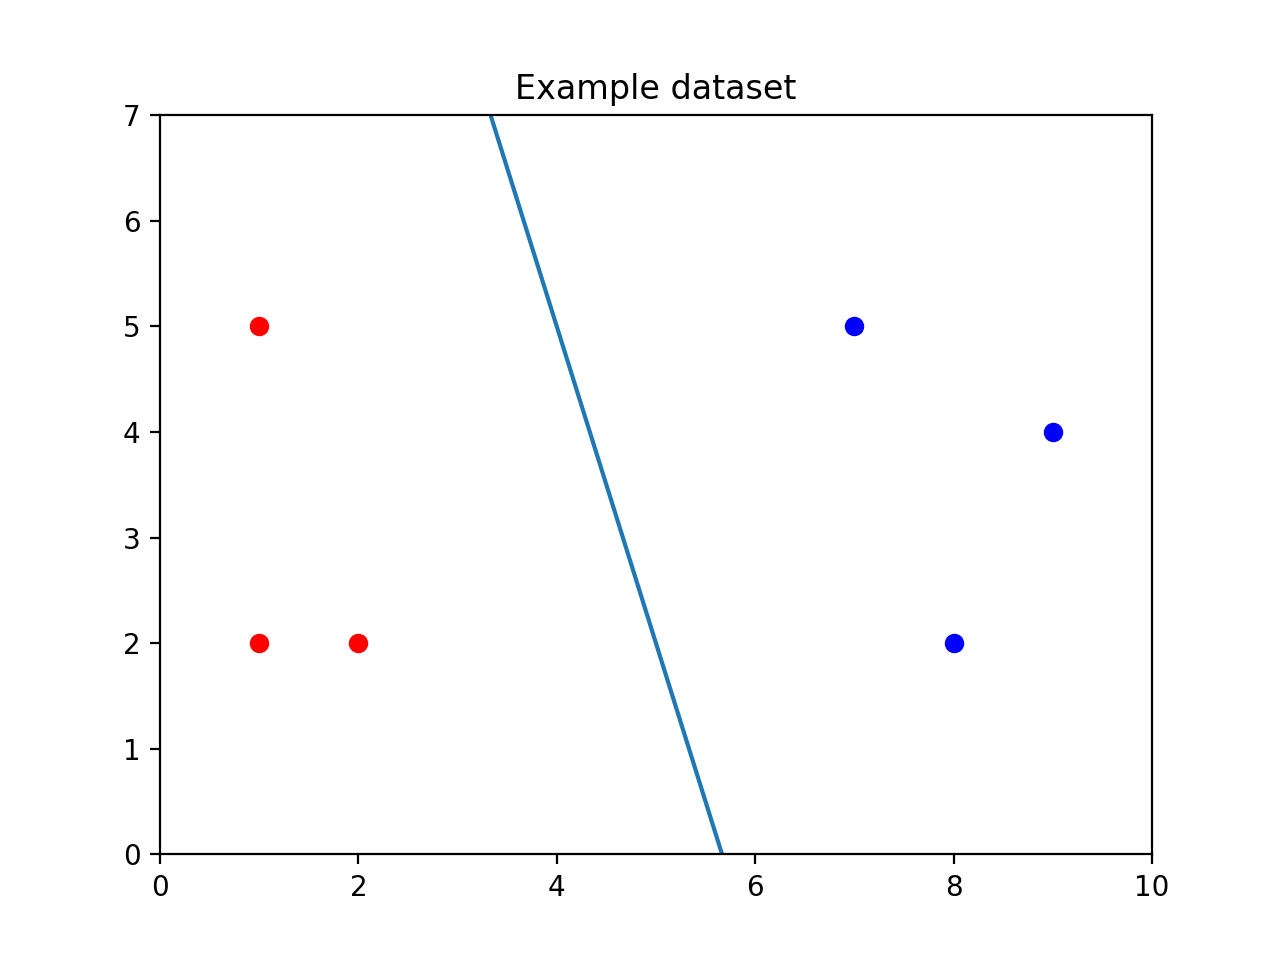

In [2]:
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/svm05.png")

In [3]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear') # ?

training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0] # 빨간색, 파란색 구분

classifier.fit (training_points, labels) # 학습

SVC(kernel='linear')

In [14]:
import numpy as np
test_points = (3, 2)
test_points_n = np.array(test_points)
test_points_n
# test_points_n # array([3, 2])
# test_points_n.shape # (2, )

array([3, 2])

In [20]:
test_points_n_r = test_points_n.reshape(1,-1)
test_points_n_r # array([[3, 2]])
# test_points_n_r.shape # (1, 2)

array([[3, 2]])

 - .predict()의 인자로 들어가는 X변수, 즉 feature는 배열이여야 하며(리스트X)

 - 그 shape 또한 fit()에 인자로 들어간 학습데이터와 같아야 한다.

In [21]:
classifier.predict(test_points_n_r) # 예측 → 1 : 빨간색으로 예측

array([1])

### SVM에서의 이상치(Outlier)를 얼마나 허용할 것인가

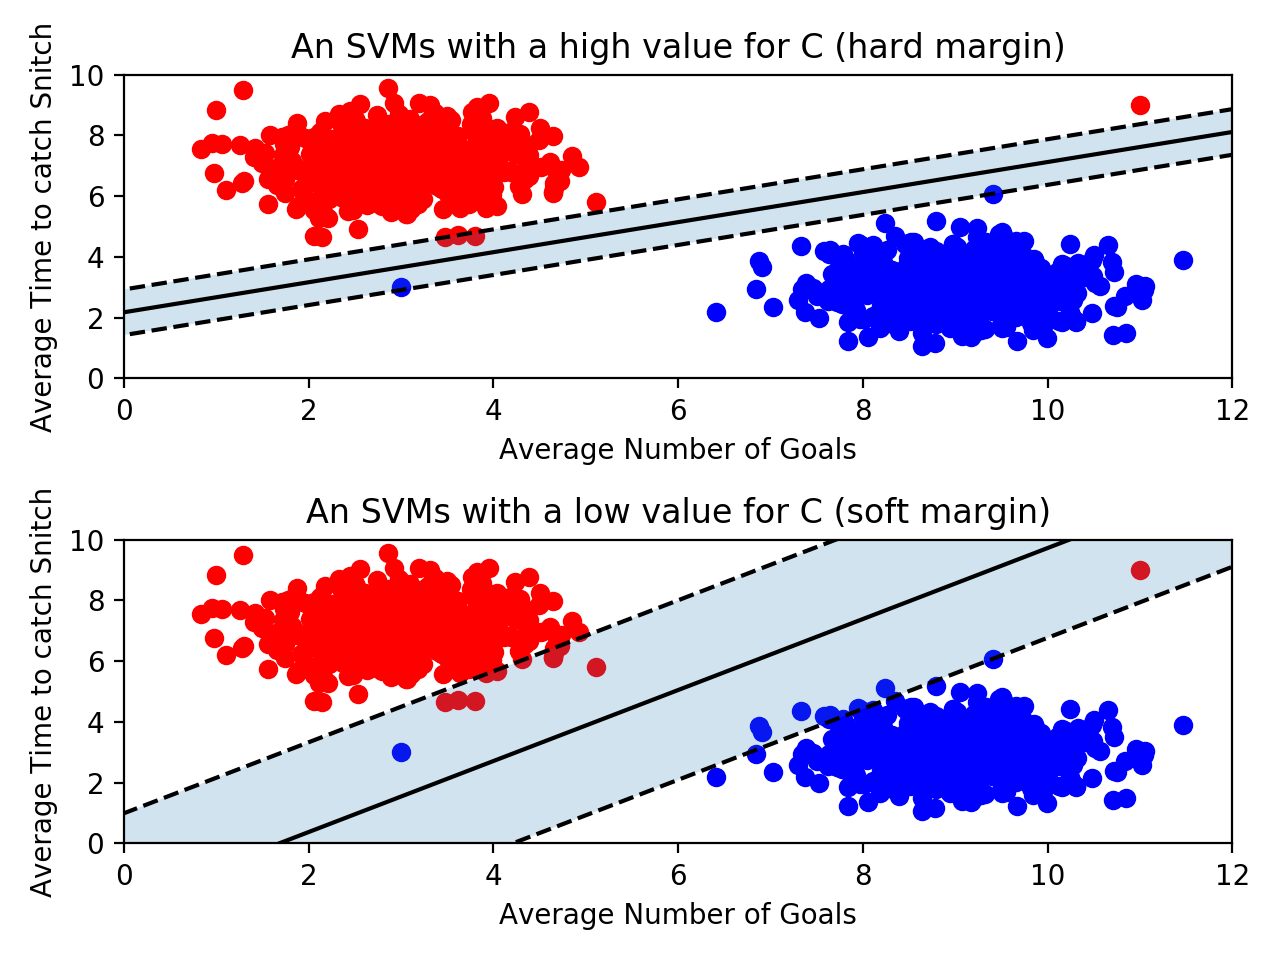

In [22]:
Image("/content/drive/MyDrive/Colab Notebooks/svm06.png")

 - 위의 그림은 하드 마진(hard margin), 
 
 서포트 벡터와 결정 경계사이의 거리가 매우 좁다, 이렇게 개별적인 학습 데이터 들을 다 놓치지 않으려고 아웃라이어를 허용하지 않는 기준으로 결정 경계를 정하면 → 오버피팅(overfitting) 문제 발생

- 아래 그림은 소프트 마진(soft margin),

  아웃라이어들이 마진안에 어느정도 포함되도록 너그럽게 기준을 잡아 서포트 벡터와 결정 경계 사이의 거리가 멀어져 마진이 커짐, 대충대충 학습하는 꼴 → 언더피팅(underfitting) 문제 발생

### 파라미터 C
classifier = SVC(C = 0.01)
C값이 클수록 하드마진(오류 허용 안함), 작을수록 소프트 마진(오류를 허용 함)

### 커널(Kernel)
선형으로 결정 경계를 그을 수 없는 데이터 세트에 적용

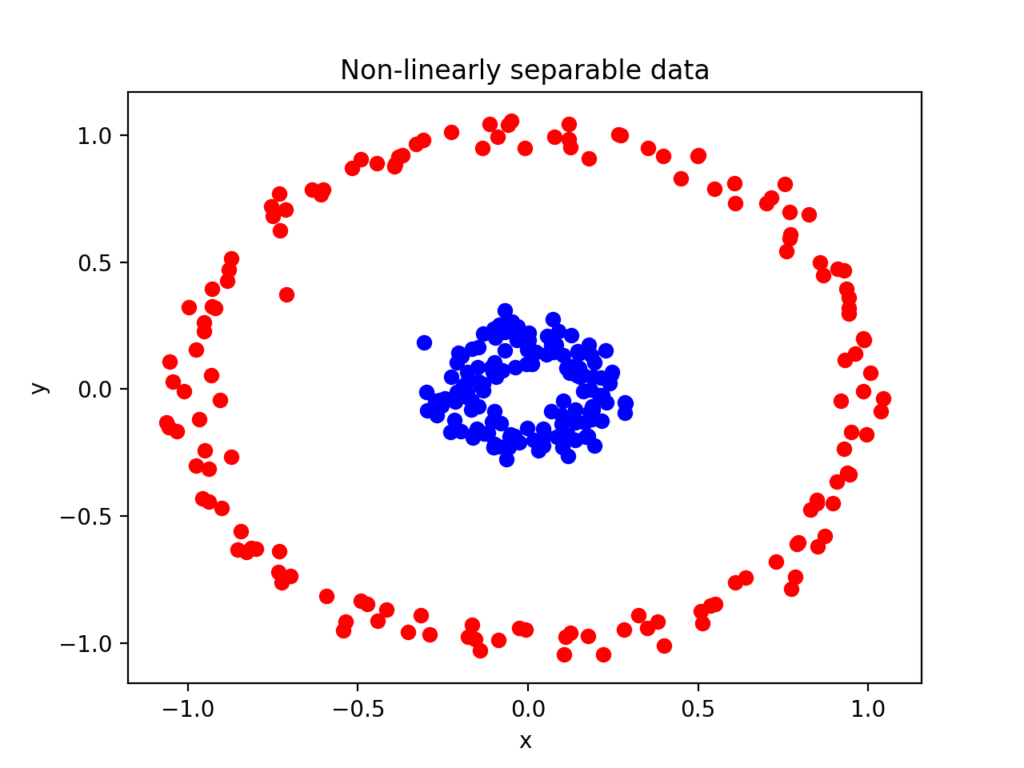

In [25]:
Image("/content/drive/MyDrive/Colab Notebooks/SVM_kernel_poly.png")

머신러닝 모델이 약간의 오차를 허용해야 하는 것은 당연하며, 단순히 outlier 때문에 선형으로 분리할 수 없다고 판단해서는 안된다.

일부 아웃라이어에 맞추기 위해 비선형으로 결정 경계를 만들게 되면 결국 모델이 데이터에 과도하게 적합해지게 됨 → 오버피팅

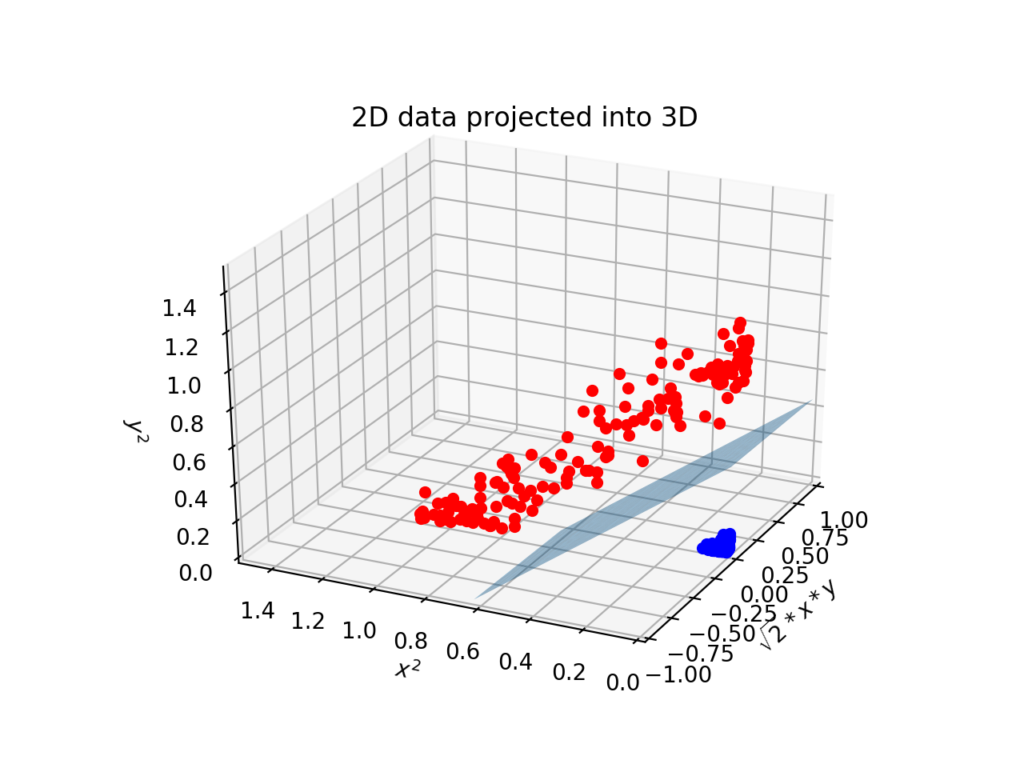

In [27]:
Image("/content/drive/MyDrive/Colab Notebooks/SVM_kernel_poly_3d.png")

2차원에서 x,y 좌표로 이루어진 점들을 아래 식을 통해 3차원으로 표현

다항식 커널을 사용하면 데이터를 더 높은 차원으로 변형하여 초평면(hyperplane)의 결정 경계를 얻을 수 있다.

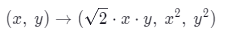

In [28]:
Image("/content/drive/MyDrive/Colab Notebooks/SVM_kernel_poly_1.png")

#### 방사 기저 함수(RBF : Radial Bias Function)
RBF커널 또는 가우시안 커널이라고 부르며
SVC()모델을 불러올때 파라미터로 아래와 같은 kernel 값을 넣어 줄 수 있다.
 - 'linear', 'poly', 'simoid', 'rbf'


kernel값을 따로 안 넣어주면 기본값 : 'rbf'

RBF 커널은 2차원의 점을 무한한 차원의 점으로 변환하며(시각화 불가능)

### 파라미터 gamma
classifier = SVC(kernel = 'rbf', C = 2, gamma = 0.5)

gamma는 결정 경계를 얼마나 유연하게 그을지
(학습데이터에 얼마나 민감하게 반응할지 모델을 조정하므로 C와 비슷한 개념)

- gamma 값을 높이면 데이터에 많이 의존해서 결정경계를 구불구불 긋게 됨 → 오버피팅

- gamma 값을 낮추면 데이터에 덜 의존하므로 결정경계가 직선에 가깝게 됨 → 언더피팅

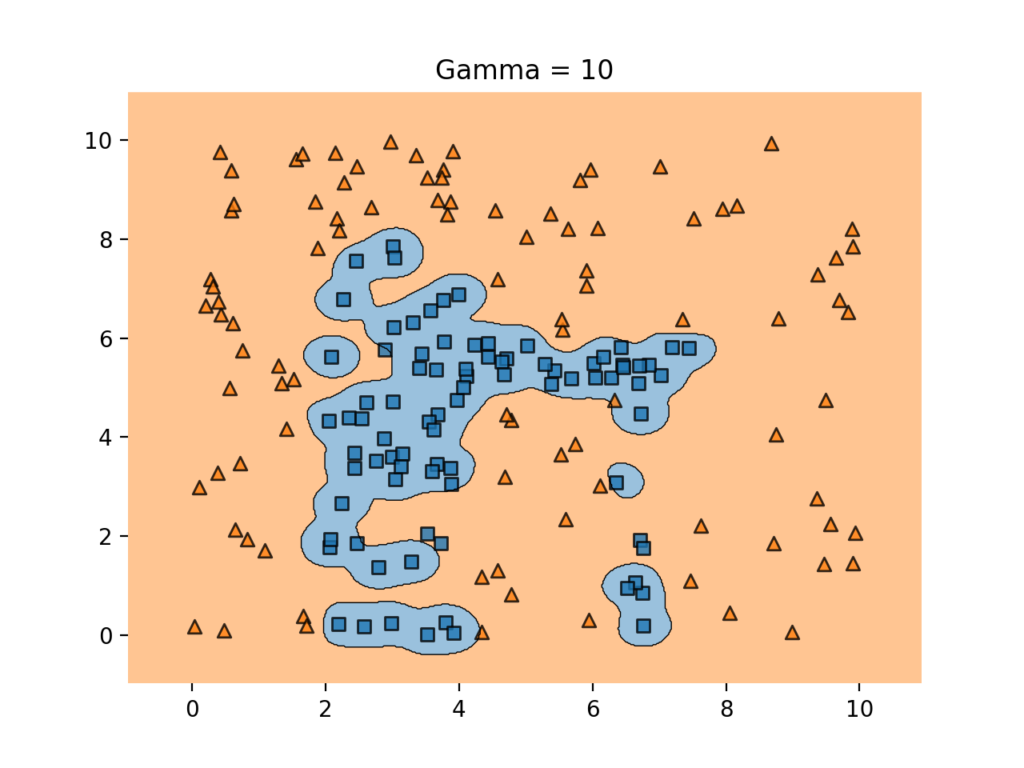

In [23]:
Image("/content/drive/MyDrive/Colab Notebooks/SVM_gamma_low.png")

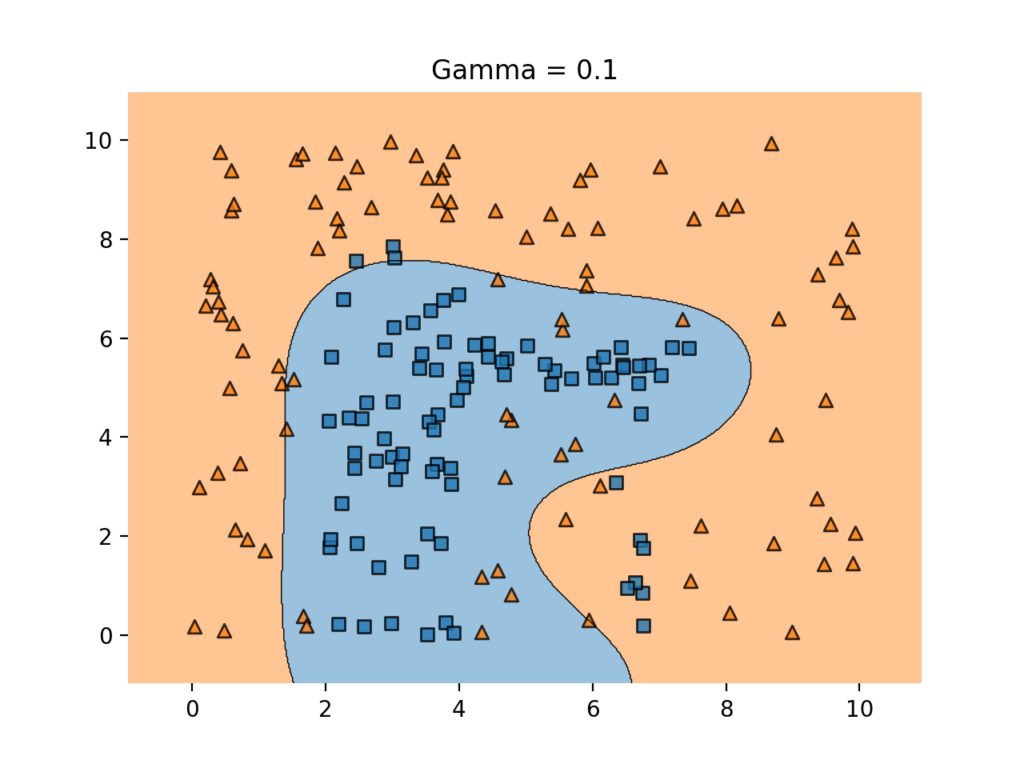

In [24]:
Image("/content/drive/MyDrive/Colab Notebooks/SVM_gamma_high.png")